In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
#helpful link to refer to
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177861-analyze-the-results-of-a-k-means-clustering

In [2]:
combined_df = pd.read_csv('crime_politics.csv')
combined_df

,Unnamed: 0,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,...,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
0,0,1991,AR,South,5,1991-08-31,1,White,1,Intimidation,...,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
1,1,1991,AR,South,6,1991-09-19,1,Black or African American,1,Simple Assault,...,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
2,2,1991,AR,South,3,1991-07-04,1,Black or African American,1,Aggravated Assault,...,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
3,3,1991,AR,South,3,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,...,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
4,4,1991,AR,South,3,1991-12-23,1,Black or African American,1,Aggravated Assault,...,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219572,111023,2020,WY,West,5,2020-11-29,6,White,2,Intimidation,...,Anti-Lesbian (Female),Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219573,111024,2020,WY,West,5,2020-07-14,0,Unknown,1,Destruction/Damage/Vandalism of Property,...,Anti-White,Government,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219574,111025,2020,WY,West,5,2020-10-16,1,Black or African American,1,Aggravated Assault,...,Anti-White,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219575,111026,2020,WY,West,5,2020-01-30,1,White,1,Simple Assault,...,Anti-Female,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided


In [3]:
combined_df.columns

Index(['Unnamed: 0', 'DATA_YEAR', 'STATE_ABBR', 'REGION_NAME',
       'POPULATION_GROUP_CODE', 'INCIDENT_DATE', 'TOTAL_OFFENDER_COUNT',
       'OFFENDER_RACE', 'VICTIM_COUNT', 'OFFENSE_NAME', 'LOCATION_NAME',
       'BIAS_DESC', 'VICTIM_TYPES', 'CONGRESS', 'YEAR_START', 'YEAR_END',
       'HOUSE_MAJORITY', 'SENATE_MAJORITY', 'PRESIDENCY', 'PRESIDENT',
       'PARTY_GOVERNMENT'],
      dtype='object')

In [4]:
combined_df.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
combined_df.head(10)

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
0,1991,AR,South,5,1991-08-31,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
1,1991,AR,South,6,1991-09-19,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
2,1991,AR,South,3,1991-07-04,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
3,1991,AR,South,3,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
4,1991,AR,South,3,1991-12-23,1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
5,1991,AR,South,3,1991-07-27,1,Black or African American,1,Robbery,Grocery/Supermarket,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
6,1991,AR,South,2,1991-11-14,2,Black or African American,1,Aggravated Assault,School-College/University,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
7,1991,AR,South,3,1991-07-10,1,Black or African American,2,Aggravated Assault;Murder and Nonnegligent Man...,Residence/Home,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
8,1991,AR,South,3,1991-10-06,2,Black or African American,1,Intimidation,Residence/Home,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
9,1991,AR,South,3,1991-10-04,10,Black or African American,2,Robbery,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided


In [17]:
combined_df.describe()

,DATA_YEAR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,CONGRESS,YEAR_START,YEAR_END
count,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000
mean,2005.472691,0.955724,1.247567,108.983523,2004.967046,2006.967046
std,8.591466,1.358364,2.274116,4.284975,8.569949,8.569949
min,1991.000000,0.000000,1.000000,102.000000,1991.000000,1993.000000
25%,1998.000000,0.000000,1.000000,105.000000,1997.000000,1999.000000
50%,2005.000000,1.000000,1.000000,109.000000,2005.000000,2007.000000
75%,2013.000000,1.000000,1.000000,113.000000,2013.000000,2015.000000
max,2020.000000,99.000000,900.000000,116.000000,2019.000000,2021.000000


In [18]:
combined_df.values

array([[1991, 'AR', 'South', ..., 'Republican', 'G.H.W Bush', 'Divided '],
       [1991, 'AR', 'South', ..., 'Republican', 'G.H.W Bush', 'Divided '],
       [1991, 'AR', 'South', ..., 'Republican', 'G.H.W Bush', 'Divided '],
       ...,
       [2020, 'WY', 'West', ..., 'Republican', 'Trump', 'Divided'],
       [2020, 'WY', 'West', ..., 'Republican', 'Trump', 'Divided'],
       [2020, 'WY', 'West', ..., 'Republican', 'Trump', 'Divided']],
      dtype=object)

In [19]:
combined_df['BIAS_DESC'].unique()

array(['Anti-Black or African American', 'Anti-White', 'Anti-Jewish',
       'Anti-Arab', 'Anti-Protestant', 'Anti-Other Religion',
       'Anti-Islamic (Muslim)', 'Anti-Gay (Male)', 'Anti-Asian',
       'Anti-Catholic', 'Anti-Heterosexual', 'Anti-Hispanic or Latino',
       'Anti-Other Race/Ethnicity/Ancestry', 'Anti-Multiple Religions',
       'Anti-Multiple Races, Group', 'Anti-Lesbian (Female)',
       'Anti-Native American', 'Anti-Atheism/Agnosticism',
       'Anti-Bisexual', 'Anti-Physical Disability',
       'Anti-Mental Disability', 'Anti-Transgender',
       'Anti-Gender Non-Conforming',
       'Anti-Native Hawaiian or Other Pacific Islander', 'Anti-Female',
       'Anti-Male', 'Anti-Jehovahs Witness', 'Anti-Mormon',
       'Anti-Buddhist', 'Anti-Sikh', 'Anti-Other Christian', 'Anti-Hindu',
       'Anti-Eastern Orthodox (Russian, Greek, Other)',
       'Anti-Other Race/Ethnicity/Ancestry;Anti-Sikh',
       "Unknown (offender's motivation not known)"], dtype=object)

In [20]:
Anti_Black_df = combined_df[combined_df["BIAS_DESC"] == 'Anti-Black or African American']

In [21]:
Anti_Black_df

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
0,1991,AR,South,5,1991-08-31,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
2,1991,AR,South,3,1991-07-04,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
11,1991,AR,South,8D,1991-10-14,1,White,1,Intimidation,School-College/University,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
12,1991,AZ,West,1B,1991-01-15,0,Unknown,1,Intimidation,Residence/Home,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
15,1991,AZ,West,1B,1991-02-04,1,White,1,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219561,2020,WY,West,4,2020-07-06,0,Unknown,1,Destruction/Damage/Vandalism of Property,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219563,2020,WY,West,3,2020-06-27,0,Unknown,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219567,2020,WY,West,5,2020-02-23,2,White,1,Intimidation,Park/Playground,Anti-Black or African American,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219569,2020,WY,West,5,2020-08-24,1,White,2,Aggravated Assault,Hotel/Motel/Etc.,Anti-Black or African American,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided


In [22]:
#bias_all_years.columns

In [23]:
#groupby state and bias description
grouped_states = Anti_Black_df.groupby(['STATE_ABBR'])

In [24]:
#total bias count for each state
#bias_states = grouped_states['TOTAL_OFFENDER_COUNT'].sum().sort_values(ascending=False)
bias_states = grouped_states['BIAS_DESC'].count().sort_values(ascending=False)


In [25]:
#convert to dataframe
bias_states = pd.DataFrame(bias_states)
bias_states

,BIAS_DESC
STATE_ABBR,
CA,11325
NJ,8099
MI,4693
NY,4450
MA,3501
OH,3278
TX,3109
MD,2776
WA,2771


In [26]:
#reset index
bias_df = bias_states.reset_index()
bias_df

,STATE_ABBR,BIAS_DESC
0,CA,11325
1,NJ,8099
2,MI,4693
3,NY,4450
4,MA,3501
5,OH,3278
6,TX,3109
7,MD,2776
8,WA,2771
9,AZ,2337


Text(0, 0.5, 'Total Anti-Black Bias Count')

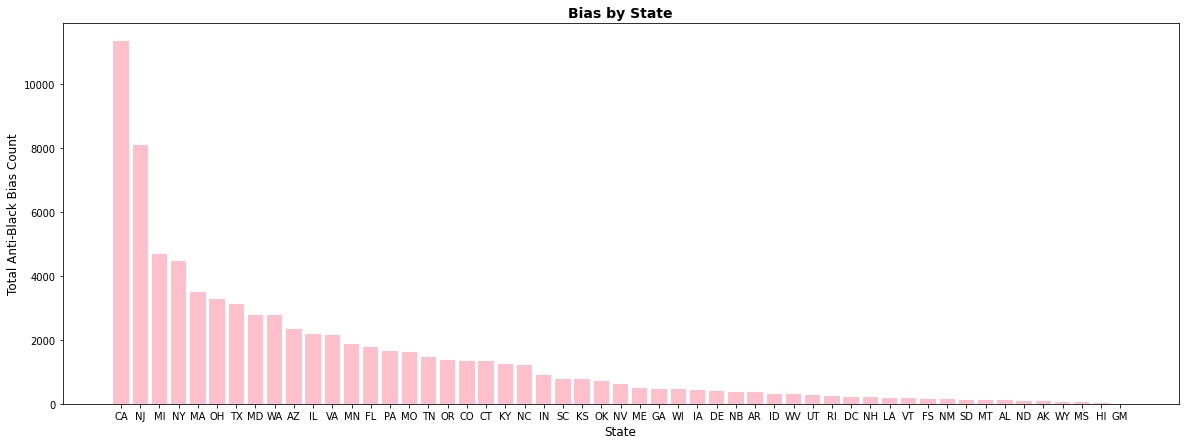

In [27]:
#visualize
state = bias_df['STATE_ABBR']
crime = bias_df['BIAS_DESC']

plt.figure(figsize=(20,7))

#plot the graph
bar_chart  = plt.bar(state, crime, color ='pink', align = 'center')
plt.title('Bias by State', fontsize = 14, fontweight = 'bold')
plt.xlabel('State', fontsize = 12)
plt.ylabel('Total Anti-Black Bias Count', fontsize = 12)

In [28]:
#add total victim count
state_offender_count = grouped_states['TOTAL_OFFENDER_COUNT'].sum().sort_values(ascending=False)

In [29]:
offender_df = pd.DataFrame(state_offender_count)
offender_df

,TOTAL_OFFENDER_COUNT
STATE_ABBR,
CA,13253
MI,4713
NJ,4317
TX,3329
OH,3318
MA,2933
IL,2805
WA,2668
NY,2604


In [30]:
offender_df1 = offender_df.reset_index()
offender_df1

,STATE_ABBR,TOTAL_OFFENDER_COUNT
0,CA,13253
1,MI,4713
2,NJ,4317
3,TX,3329
4,OH,3318
5,MA,2933
6,IL,2805
7,WA,2668
8,NY,2604
9,AZ,2321


In [31]:
biases = bias_df['BIAS_DESC']
biases

0     11325
1      8099
2      4693
3      4450
4      3501
5      3278
6      3109
7      2776
8      2771
9      2337
10     2169
11     2150
12     1862
13     1788
14     1659
15     1625
16     1452
17     1380
18     1348
19     1331
20     1248
21     1225
22      885
23      788
24      761
25      701
26      610
27      495
28      477
29      452
30      440
31      413
32      375
33      369
34      310
35      301
36      285
37      250
38      218
39      210
40      192
41      167
42      165
43      149
44      119
45      116
46      108
47      103
48       86
49       62
50       48
51       34
52        1
Name: BIAS_DESC, dtype: int64

In [32]:
bias_list = biases.to_list()

In [33]:
df2 = offender_df1.assign(Bias_Count=bias_list)
df2

,STATE_ABBR,TOTAL_OFFENDER_COUNT,Bias_Count
0,CA,13253,11325
1,MI,4713,8099
2,NJ,4317,4693
3,TX,3329,4450
4,OH,3318,3501
5,MA,2933,3278
6,IL,2805,3109
7,WA,2668,2776
8,NY,2604,2771
9,AZ,2321,2337


In [34]:
# list of states
df2['STATE_ABBR'].value_counts()

CA    1
ME    1
IA    1
AR    1
GA    1
ID    1
NB    1
DE    1
UT    1
WV    1
LA    1
RI    1
NH    1
DC    1
NM    1
FS    1
MT    1
VT    1
ND    1
SD    1
AK    1
AL    1
WY    1
MS    1
HI    1
WI    1
NV    1
MI    1
OK    1
NJ    1
TX    1
OH    1
MA    1
IL    1
WA    1
NY    1
AZ    1
FL    1
PA    1
MN    1
MO    1
VA    1
MD    1
CO    1
TN    1
OR    1
KY    1
CT    1
NC    1
IN    1
SC    1
KS    1
GM    1
Name: STATE_ABBR, dtype: int64

### Include frequency of incidents by state

In [35]:
Anti_Black_df['INCIDENT_COUNT'] = 1

In [36]:
#group incidents by year
#total number of incidents per year
#total number offenders and victims
#aggregate incident count by year and groupby state

year_sums = Anti_Black_df.groupby(['STATE_ABBR']).sum().reset_index()
hc_by_year = year_sums.drop(['CONGRESS', 'YEAR_START', 'YEAR_END', 'DATA_YEAR'], axis=1)
hc_by_year

,STATE_ABBR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,INCIDENT_COUNT
0,AK,101,121,86
1,AL,85,128,108
2,AR,440,464,369
3,AZ,2321,3100,2337
4,CA,13253,14689,11325
5,CO,1600,1846,1348
6,CT,1150,1796,1331
7,DC,177,237,218
8,DE,323,554,413
9,FL,2125,2107,1788


In [37]:
df3 = hc_by_year.assign(BIAS_COUNT=bias_list)
df3

,STATE_ABBR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,INCIDENT_COUNT,BIAS_COUNT
0,AK,101,121,86,11325
1,AL,85,128,108,8099
2,AR,440,464,369,4693
3,AZ,2321,3100,2337,4450
4,CA,13253,14689,11325,3501
5,CO,1600,1846,1348,3278
6,CT,1150,1796,1331,3109
7,DC,177,237,218,2776
8,DE,323,554,413,2771
9,FL,2125,2107,1788,2337


In [38]:
#IF CLUSTERING DOESN'T WORK WITH ABOVE DATAFRAME, DO RATIO (TOTAL ANTI-BLACK/TOTAL INCIDENCE FOR EACH STATE)
#DON'T NEED TO NORMALIZE AND ENCODE

In [39]:
df3.describe()

,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,INCIDENT_COUNT,BIAS_COUNT
count,53.000000,53.000000,53.000000,53.000000
mean,1353.981132,1797.320755,1420.113208,1420.113208
std,2036.906955,2519.286856,2052.733465,2052.733465
min,6.000000,1.000000,1.000000,1.000000
25%,177.000000,297.000000,210.000000,210.000000
50%,648.000000,807.000000,610.000000,610.000000
75%,1899.000000,2318.000000,1788.000000,1788.000000
max,13253.000000,14689.000000,11325.000000,11325.000000


### KMeans Clustering: normalizing

In [40]:
X = df3.drop('STATE_ABBR', axis=1)
y = df3['STATE_ABBR']

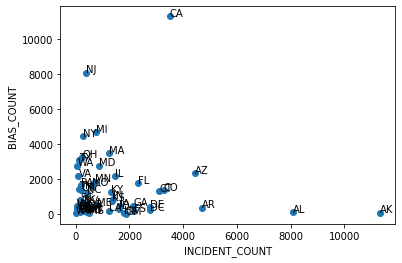

In [41]:
plt.scatter(X['BIAS_COUNT'], X['INCIDENT_COUNT'])

#add labels
for i, txt in enumerate(y):
    plt.annotate(txt, (X['BIAS_COUNT'][i], X['INCIDENT_COUNT'][i]))
    
plt.xlabel('INCIDENT_COUNT')
plt.ylabel('BIAS_COUNT')
plt.show()

In [46]:
X

,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,INCIDENT_COUNT,BIAS_COUNT
0,101,121,86,11325
1,85,128,108,8099
2,440,464,369,4693
3,2321,3100,2337,4450
4,13253,14689,11325,3501
5,1600,1846,1348,3278
6,1150,1796,1331,3109
7,177,237,218,2776
8,323,554,413,2771
9,2125,2107,1788,2337


In [51]:
#instatiate normalizer
norm = Normalizer()
#fit normalizer to data
X_norm = norm.fit_transform(X)

In [52]:
#convert back to dataframe
norm_df  = pd.DataFrame(X_norm, columns = ["TOTAL_OFFENDER_COUNT", "VICTIM_COUNT", "INCIDENT_COUNT", "BIAS_COUNT"])
norm_df

,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,INCIDENT_COUNT,BIAS_COUNT
0,0.008917,0.010683,0.007593,0.999874
1,0.010492,0.015800,0.013331,0.999731
2,0.092618,0.097669,0.077672,0.987851
3,0.365790,0.488561,0.368312,0.701321
4,0.574633,0.636896,0.491037,0.151799
5,0.371690,0.428838,0.313149,0.761500
6,0.287630,0.449203,0.332900,0.777601
7,0.063209,0.084636,0.077851,0.991353
8,0.112384,0.192758,0.143699,0.964139
9,0.506332,0.502043,0.426033,0.556846


### Clustering

In [53]:
inertias = []

for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k)
    model.fit(X_norm)
    inertia = model.inertia_
    inertias.append(inertia)

In [68]:
print(inertia)

0.2576526141298263


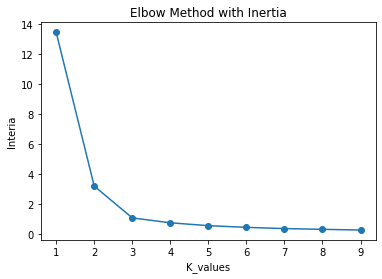

In [54]:
#plot the inerias with the k-values
#inertia measures how spread out the clusters are (lower is better)
#measures how far samples are from their centroids

plt.plot(range(1,10), inertias,  '-o')
plt.xlabel('K_values')
plt.ylabel('Interia')
plt.title("Elbow Method with Inertia")
plt.show()

The optimized number of clusters is 3

In [55]:
#create the kmeans model with 3 clusters
model = KMeans(n_clusters=3)

#fit the model
model.fit(X_norm)

#predict method on X_norm
labels = model.predict(X_norm)

In [56]:
print(labels)

[0 0 0 2 1 2 2 0 0 2 0 0 0 0 0 0 1 2 2 2 0 1 1 2 1 1 1 0 0 2 1 0 2 1 2 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]


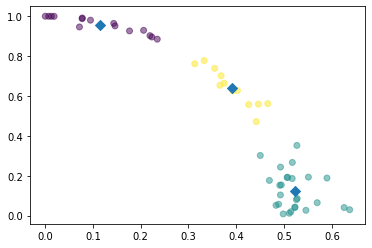

In [64]:
#assign the columns of X: xs and ys
xs = X_norm[:, 2]
ys = X_norm[:, 3]

# make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys, c=labels, alpha = 0.5)

#cluster the centroids for the values
centroids = model.cluster_centers_

#get the centroids for the values
centroid_x = centroids[:,2]
centroid_y = centroids[:,3]

#make scatter plot
plt.scatter(centroid_x, centroid_y, marker='D', s=50)
plt.show()

## Agglomerative Clustering

In [70]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_norm)

array([0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

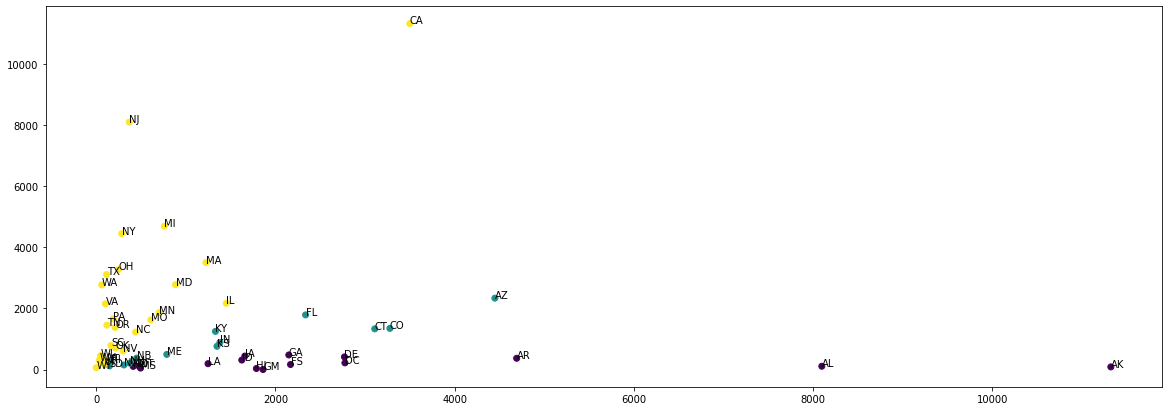

In [71]:
plt.figure(figsize=(20,7))
plt.scatter(X['BIAS_COUNT'], X['INCIDENT_COUNT'], c = cluster.labels_)

#add labels
for i, txt in enumerate(y):
    plt.annotate(txt, (X['BIAS_COUNT'][i], X['INCIDENT_COUNT'][i]))

## Hierarchical Clustering

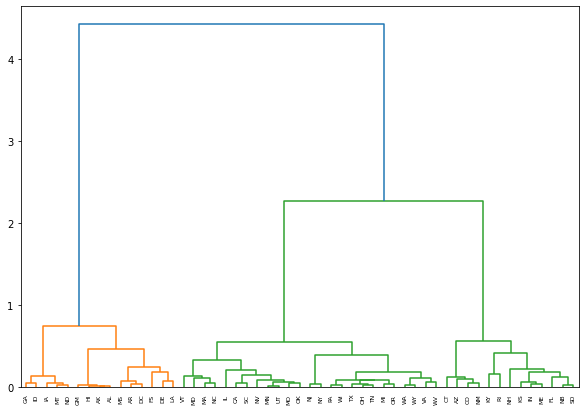

In [75]:
linked = linkage(X_norm, 'ward')
plt.figure(figsize=(10,7))
plt.xticks(fontsize=16)
dendro = dendrogram(linked, labels=list(y))
plt.show()

### Are hate crime incidents a predictor of electoral outcome?
- use for logistic regression model